# Transformers, what can they do?

Install the Transformers and Datasets libraries to run this notebook.

In [1]:
!pip install datasets transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 6.6 MB/s 
     |████████████████████████████████| 4.4 MB 33.0 MB/s 
     |████████████████████████████████| 212 kB 40.8 MB/s 
     |████████████████████████████████| 140 kB 26.0 MB/s 
     |████████████████████████████████| 1.1 MB 37.6 MB/s 
     |████████████████████████████████| 101 kB 8.9 MB/s 
     |████████████████████████████████| 596 kB 43.1 MB/s 
     |████████████████████████████████| 127 kB 38.1 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
     |████████████████████████████████| 144 kB 39.0 MB/s 
     |████████████████████████████████| 271 kB 38.7 MB/s 
     |████████████████████████████████| 6.6 MB 11.0 MB/s 
     |████████████████████████████████| 1.2 MB 36.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3

### sentiment-analysis

In [2]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [11]:
classifier([
    "I will love it.", 
    "I hate this so much!"
])

classifier([
    "I don't I will love it.", 
    "I hate this so much!"
])

[{'label': 'NEGATIVE', 'score': 0.9984734654426575},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

In [9]:
classifier("I've been waiting for a HuggingFace course my whole life.")

[{'label': 'POSITIVE', 'score': 0.9598048329353333}]

### zero-shot-classification

In [12]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [13]:
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

{'labels': ['education', 'business', 'politics'],
 'scores': [0.8445987105369568, 0.11197440326213837, 0.043426960706710815],
 'sequence': 'This is a course about the Transformers library'}

### text-generation

In [14]:
from transformers import pipeline

generator = pipeline("text-generation")


No model was supplied, defaulted to gpt2 (https://huggingface.co/gpt2)


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [15]:
generator("In this course, we will teach you how to")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to manage your personal data about mobile, Gmail, Google, Dropbox, Google Drive and more. We will also help you to discover why some companies have taken to restricting access to your personal data while using data'}]

In [16]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")


Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/336M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [17]:
generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to write JavaScript using simple web-based programming languages.\n\n\n\n\nBuilding web-based JavaScript'},
 {'generated_text': 'In this course, we will teach you how to use CSS to use your own CSS. Here are some of the basics.\n\n\n\nCSS'}]

### fill-mask

In [18]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

No model was supplied, defaulted to distilroberta-base (https://huggingface.co/distilroberta-base)


Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

[{'score': 0.196198508143425,
  'sequence': 'This course will teach you all about mathematical models.',
  'token': 30412,
  'token_str': ' mathematical'},
 {'score': 0.040527332574129105,
  'sequence': 'This course will teach you all about computational models.',
  'token': 38163,
  'token_str': ' computational'}]

### NER

In [19]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner('My name is Serdar and have been working at Clarusway in NC since 2021 ... ')

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/token_classification.py:136: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  "`grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to"


[{'end': 17,
  'entity_group': 'PER',
  'score': 0.9989112,
  'start': 11,
  'word': 'Serdar'},
 {'end': 52,
  'entity_group': 'ORG',
  'score': 0.96004856,
  'start': 43,
  'word': 'Clarusway'},
 {'end': 58,
  'entity_group': 'LOC',
  'score': 0.9885876,
  'start': 56,
  'word': 'NC'}]

### question-answering

In [20]:
from transformers import pipeline

question_answerer = pipeline("question-answering")


No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [24]:
question_answerer(
    question="Do I hate grape?",
    context="I like pizza, hamburger and banana, but I really dislike grape"
)

{'answer': 'really dislike grape',
 'end': 62,
 'score': 0.28502964973449707,
 'start': 42}

### summarization

In [25]:
from transformers import pipeline

summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

In [26]:
summarizer("""
    America has changed dramatically during recent years. Not only has the number of 
    graduates in traditional engineering disciplines such as mechanical, civil, 
    electrical, chemical, and aeronautical engineering declined, but in most of 
    the premier American universities engineering curricula now concentrate on 
    and encourage largely the study of engineering science. As a result, there 
    are declining offerings in engineering subjects dealing with infrastructure, 
    the environment, and related issues, and greater concentration on high 
    technology subjects, largely supporting increasingly complex scientific 
    developments. While the latter is important, it should not be at the expense 
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other 
    industrial countries in Europe and Asia, continue to encourage and advance 
    the teaching of engineering. Both China and India, respectively, graduate 
    six and eight times as many traditional engineers as does the United States. 
    Other industrial countries at minimum maintain their output, while America 
    suffers an increasingly serious decline in the number of engineering graduates 
    and a lack of well-educated engineers.
""")

[{'summary_text': ' America has changed dramatically during recent years . The number of engineering graduates in the U.S. has declined in traditional engineering disciplines such as mechanical, civil,    electrical, chemical, and aeronautical engineering . Rapidly developing economies such as China and India continue to encourage and advance the teaching of engineering .'}]

### translation

In [27]:
from transformers import pipeline

translator = pipeline('translation', model='Helsinki-NLP/opus-mt-tr-en')

Downloading:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/293M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/820k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/778k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.49M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/marian/tokenization_marian.py:198: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [28]:
translator('Merhaba adiniz nedir?')

[{'translation_text': "Hello, what's your name?"}]

#### Google Universal Sentence Encoder

In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import seaborn as sns

In [5]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


##### Getting embeddings

In [31]:
word = "Horse"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")

messages = [word, sentence, paragraph]

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Horse
Embedding size: 512
Embedding: [-0.062299225479364395, 0.014073384925723076, 0.03739478811621666, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.050808604806661606, -0.016524329781532288, 0.01573779620230198, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [-0.028332693502306938, -0.0558621808886528, -0.012941480614244938, ...]



##### Semantic Similarity

In [32]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

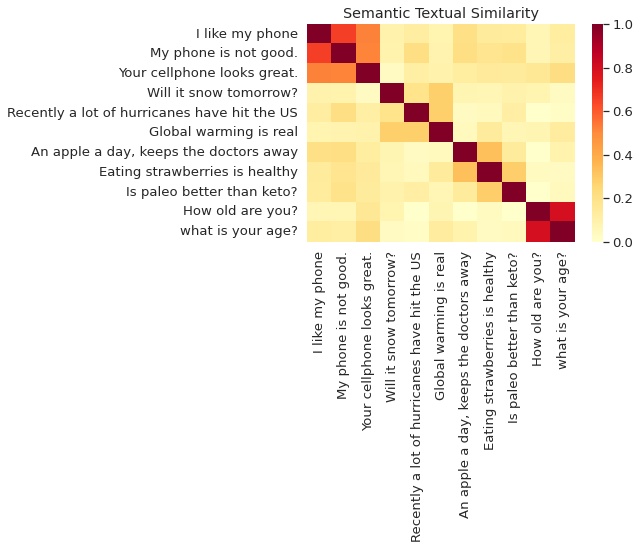

In [33]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)

##### Tweet Clasification

In [34]:
# For Colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [35]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Clarusway_NLP/Clarusway/clarusway-ds-students-7-21-main/3- Classes_Labs/NLP/NLP-1/airline_tweets.csv')
#df = pd.read_csv("airline_tweets.csv")


In [36]:
df = df[['airline_sentiment','text']]
df.rename(columns={'airline_sentiment':'sentiment'}, inplace=True)
df.sample(20)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sentiment,text
8985,positive,@USAirways Well I did miss it. But gate agents...
5890,neutral,@SouthwestAir thank you. Please follow and I w...
5996,positive,@SouthwestAir listening center is open seating...
13914,negative,@AmericanAir ok. Pilots are looking for agents...
10816,neutral,@USAirways sure did. I have carried this bag o...
7275,positive,@JetBlue ha ha! Can I get a wake up call at bo...
6365,negative,“@SouthwestAir: @TinaIsBack I'm so sorry for y...
12444,positive,@AmericanAir @USAirways Statement wasn't sent ...
3674,positive,@united @parryaftab done thnx
10750,negative,@USAirways thanks for nothing


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size = 0.2, stratify = df['sentiment'], random_state = 4299)

In [38]:
X_train_embeddings = embed(X_train.to_list())
X_test_embeddings = embed(X_test.to_list())

In [39]:
from sklearn.metrics import plot_confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
def eval(model, X_test):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    sns.set_context('talk')
    fig, ax = plt.subplots(figsize=(7, 7))
    plot_confusion_matrix(model, X_test, y_test, ax = ax, values_format = '.0f')

In [40]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_embeddings, y_train)

LogisticRegression(max_iter=1000)

LOGREG MODEL
              precision    recall  f1-score   support

    negative       0.87      0.92      0.89      1835
     neutral       0.70      0.64      0.67       620
    positive       0.80      0.69      0.74       473

    accuracy                           0.82      2928
   macro avg       0.79      0.75      0.77      2928
weighted avg       0.82      0.82      0.82      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


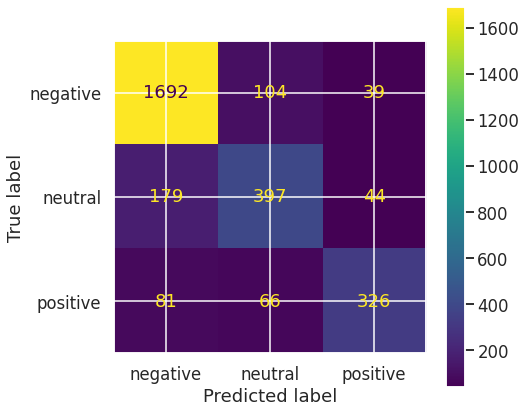

In [41]:
print("LOGREG MODEL")
eval(log, X_test_embeddings)

In [42]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.2)
svc.fit(X_train_embeddings, y_train)

LinearSVC(C=0.2)

SVC MODEL
              precision    recall  f1-score   support

    negative       0.86      0.93      0.89      1835
     neutral       0.71      0.61      0.66       620
    positive       0.80      0.69      0.74       473

    accuracy                           0.82      2928
   macro avg       0.79      0.74      0.76      2928
weighted avg       0.82      0.82      0.82      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


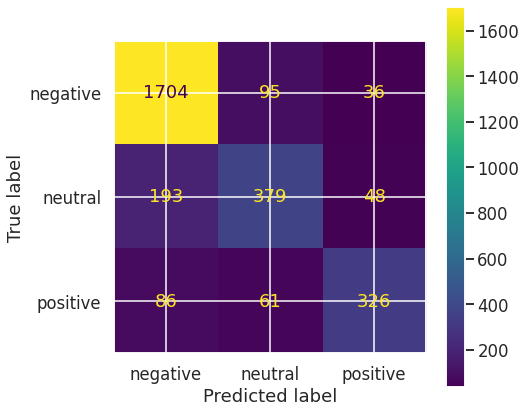

In [43]:
print("SVC MODEL")
eval(svc, X_test_embeddings)

#### BERT

In [1]:
BERT_MODEL = "https://tfhub.dev/google/experts/bert/wiki_books/2" # @param {type: "string"} ["https://tfhub.dev/google/experts/bert/wiki_books/2", "https://tfhub.dev/google/experts/bert/wiki_books/mnli/2", "https://tfhub.dev/google/experts/bert/wiki_books/qnli/2", "https://tfhub.dev/google/experts/bert/wiki_books/qqp/2", "https://tfhub.dev/google/experts/bert/wiki_books/squad2/2", "https://tfhub.dev/google/experts/bert/wiki_books/sst2/2",  "https://tfhub.dev/google/experts/bert/pubmed/2", "https://tfhub.dev/google/experts/bert/pubmed/squad2/2"]
# Preprocessing must match the model, but all the above use the same.
PREPROCESS_MODEL = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

In [2]:
sentences = [
  "Here We Go Then, You And I is a 1999 album by Norwegian pop artist Morten Abel. It was Abel's second CD as a solo artist.",
  "The album went straight to number one on the Norwegian album chart, and sold to double platinum.",
  "Among the singles released from the album were the songs \"Be My Lover\" and \"Hard To Stay Awake\".",
  "Riccardo Zegna is an Italian jazz musician.",
  "Rajko Maksimović is a composer, writer, and music pedagogue.",
  "One of the most significant Serbian composers of our time, Maksimović has been and remains active in creating works for different ensembles.",
  "Ceylon spinach is a common name for several plants and may refer to: Basella alba Talinum fruticosum",
  "A solar eclipse occurs when the Moon passes between Earth and the Sun, thereby totally or partly obscuring the image of the Sun for a viewer on Earth.",
  "A partial solar eclipse occurs in the polar regions of the Earth when the center of the Moon's shadow misses the Earth.",
]

In [46]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 5.3 MB/s 
     |████████████████████████████████| 511.7 MB 6.6 kB/s 
     |████████████████████████████████| 5.8 MB 17.4 MB/s 
     |████████████████████████████████| 1.6 MB 42.0 MB/s 
     |████████████████████████████████| 438 kB 50.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninst

In [6]:
import tensorflow_text as text  # Imports TF ops for preprocessing.

preprocess = hub.load(PREPROCESS_MODEL)
bert = hub.load(BERT_MODEL)
inputs = preprocess(sentences)
outputs = bert(inputs)

In [7]:
from sklearn.metrics import pairwise
def plot_similarity(features, labels):
  """Plot a similarity matrix of the embeddings."""
  cos_sim = pairwise.cosine_similarity(features)
  sns.set(font_scale=1.2)
  cbar_kws=dict(use_gridspec=False, location="left")
  g = sns.heatmap(
      cos_sim, xticklabels=labels, yticklabels=labels,
      vmin=0, vmax=1, cmap="Blues", cbar_kws=cbar_kws)
  g.tick_params(labelright=True, labelleft=False)
  g.set_yticklabels(labels, rotation=0)
  g.set_title("Semantic Textual Similarity")

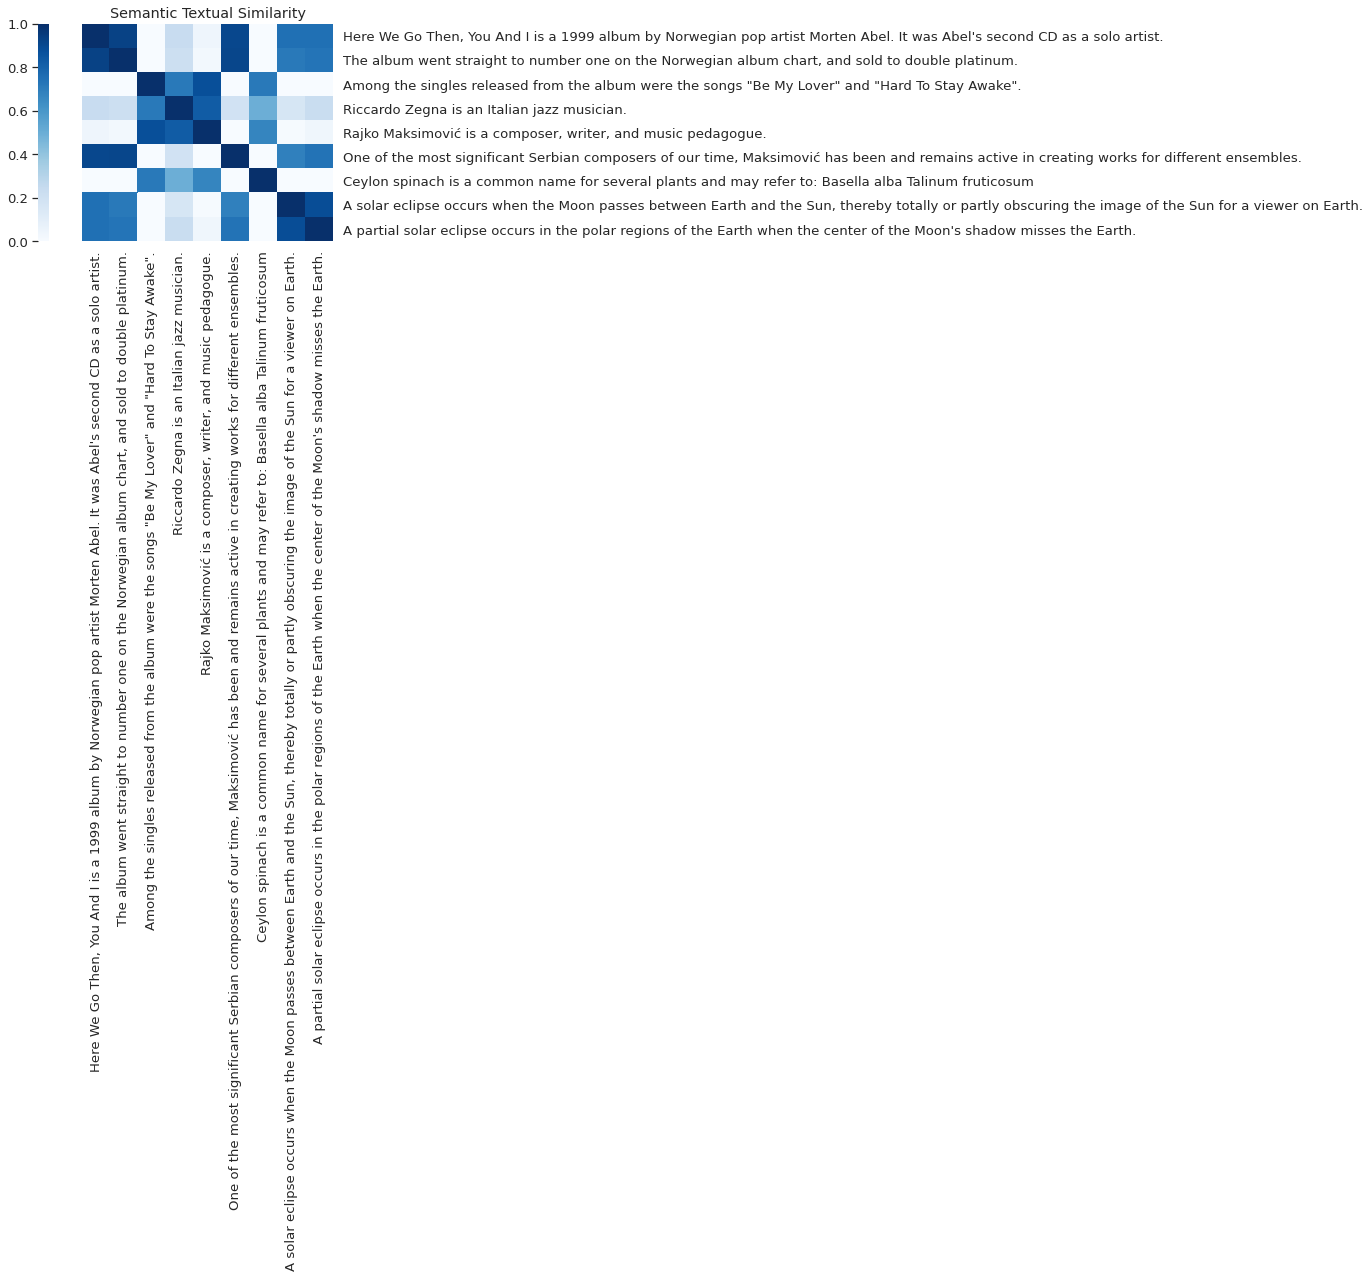

In [8]:
plot_similarity(outputs["pooled_output"], sentences)